In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput
from bokeh.transform import cumsum
from bokeh.palettes import Category10
import nltk
reset_output()
output_notebook()

Loading BokehJS ...

- Mediante el análisis visual, caracterice las condiciones en toda la ciudad y recomiende cómo deben asignarse los recursos a las 5 horas y 30 horas después del terremoto. Incluya evidencia de los datos para apoyar estas recomendaciones. Considere cómo asignar recursos tales como cuadrillas de caminos, cuadrillas de reparación de alcantarillado, equipos de energía y rescate.

In [2]:
data = pd.read_csv("./YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


In [36]:
pd.unique(data.index.day)

array([ 6,  7,  8,  9, 10])

In [41]:
pd.unique(data.location.values)

array(['Weston', 'Southton', 'Broadview', 'West Parton', 'Old Town',
       'Terrapin Springs', 'Downtown', 'Southwest', 'Scenic Vista',
       'East Parton', 'Cheddarford', 'Palace Hills', 'Safe Town',
       'Easton', 'Chapparal', 'Northwest', 'Oak Willow', 'Pepper Mill',
       'Wilson Forest', 'UNKNOWN', '<Location with-held due to contract>'],
      dtype=object)

In [45]:
sum(data.location == "UNKNOWN"), sum(data.location == "<Location with-held due to contract>")

(31, 95)

In [31]:
data.shape

(41941, 3)

In [6]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput, RangeSlider, Select
from bokeh.transform import cumsum
from bokeh.palettes import Category10
import nltk

#Se cargan los datos
data = pd.read_csv("YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
#Distribução geral dos dados
p1 = figure(plot_height=400, plot_width=800, title="Distribuição dos dados",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save", x_axis_type='datetime')
#quantidade de tweets por bairro
p2 = figure(plot_height=400, plot_width=300, title="Quantidade do tweets por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save")
#palavras mais faladas
p3 = figure(plot_height=400, plot_width=800, title="Palavras mais faladas",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save")
#hashtag mais frequentes
p4 = figure(plot_height=400, plot_width=300, title="Hashtag top",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save")

s_day = RangeSlider(title="intervalo de dias", start=6, end=10, value=(6, 10), step=1)
s_range = RangeSlider(title="intervalo de horas", start=0, end=24, value=(0,24), step=1)
 
names = ["Palace Hills", "Northwest", "Old Town", "Safe Town", "Southwest", "Downtown",
         "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Terrapin Springs",
         "Pepper Mill", "Cheddarford", "Easton", "Weston", "Southton", "Oak Willow",
         "East Parton", "West Parton"]

hist1, edges1 = np.histogram(data.index, bins=100);
source1 = ColumnDataSource(dict(hist=hist1,left=edges1[:-1], right=edges1[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue",
            line_color="white", alpha=0.7, source=source1)

select_vec = Select(title="Bairro:", value="foo", options=names)

col_1 = column([s_day,s_range,select_vec], width=200)
col_2 = column([p1, p3])
col_3 = column([p2, p4])

curdoc().add_root(row(gridplot([[col_1, col_2, col_3]]), width=400))

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [13]:
data.index

DatetimeIndex(['2020-04-06 00:00:00', '2020-04-06 00:00:00',
               '2020-04-06 00:02:00', '2020-04-06 00:04:00',
               '2020-04-06 00:07:00', '2020-04-06 00:11:00',
               '2020-04-06 00:11:00', '2020-04-06 00:12:00',
               '2020-04-06 00:13:00', '2020-04-06 00:16:00',
               ...
               '2020-04-10 11:58:00', '2020-04-10 11:58:00',
               '2020-04-10 11:58:00', '2020-04-10 11:59:00',
               '2020-04-10 11:59:00', '2020-04-10 11:59:00',
               '2020-04-10 11:59:00', '2020-04-10 11:59:00',
               '2020-04-10 11:59:00', '2020-04-10 11:59:00'],
              dtype='datetime64[ns]', name='time', length=41941, freq=None)

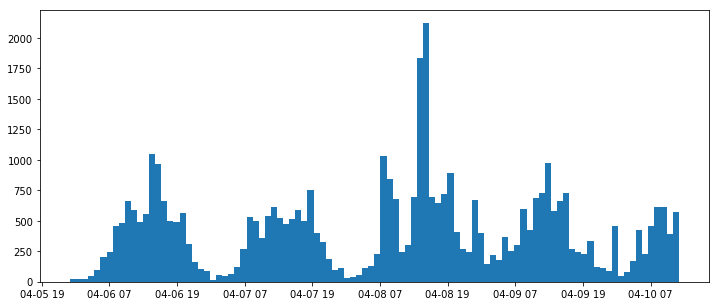

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(data.index, bins=100);

In [129]:
def histogram(df, col, bins=30):
    """
    Función para generar los intervalos y la cantidad de datos por intervalo
    
    Parámetros:
    -----------
    df: dataFrame de entrada, indice debe ser de tipo datetime
    col: columna guia para contar los intervalos
    bins: cantidad de intervalos
    
    Retorna:
    ---------
    hist: valores del histograma, cantidad de datos por intervalo.
    edges: Intervalos del histograma.
    """
    edges = []
    hist = []
    largura = max(data.index) - min(data.index)
    h = largura/bins
    aux = min(data.index)
    for i in range(100):
        edges.append(aux)
        hist.append(data.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

In [136]:
edges, hist = histogram(data,"location", bins=100)

In [137]:
p1 = figure(plot_height=400, plot_width=800, title="Quantidade de tweets por intervalo de tempo",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

p1.xaxis.axis_label = "dias registrados"
p1.yaxis.axis_label = "quantidade de tweets"
source1 = ColumnDataSource(dict(hist=hist,left=edges[:-1], right=edges[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue", 
            line_color="white", alpha=.7, source=source1, legend="tweets")
p1.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]

p1.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p1.hover.mode = "vline"
show(p1)

In [120]:
data["2020-04-08 14:37:49":"2020-04-08 15:42:36"]

,location,account,message
time,,,
2020-04-08 14:38:00,Cheddarford,TerrapinSpringsSchools,PLEASE COME TO TERRAPIN SPRINGS HIGH SCHOOL T...
2020-04-08 14:38:00,Old Town,JerryCandidB,@AdministratorSophie sorryyy gotta save my own...
2020-04-08 14:38:00,Old Town,Linda_ConnerBear1991,Iíll be famous one day!
2020-04-08 14:38:00,Weston,Barbara_RicheyCat65,re: Elective surgeries have been cancelled.
2020-04-08 14:38:00,Old Town,OldTownBlues,gas shteyahteyion lehtey me charge my phone bu...
2020-04-08 14:38:00,Southwest,DarkHoltCandy,re: Ti'ana and I spent 30 minutes trying to fi...
2020-04-08 14:38:00,Downtown,AdministratorSophie,you can have the basement
2020-04-08 14:38:00,Northwest,KathyCuriousAlley,re: So sad about those bridges. Fine work there
2020-04-08 14:38:00,Southwest,CatLadyKylieCrane,NOT LACKI!!! :scream:
